<a href="https://colab.research.google.com/github/Rigboone-68/Machine-Learning-/blob/main/Supported_Vector_Machine_By_Qasim_Ajlal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.87
F1 Score: 0.87
Error Rate: 0.13
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.78      0.78      0.78         9
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



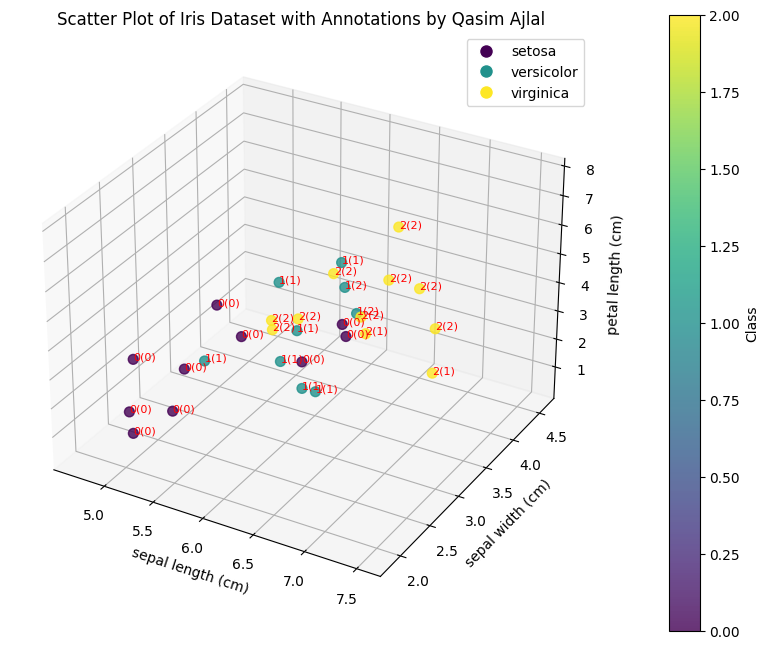

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add some noise to the dataset for variety
np.random.seed(42)
X += np.random.normal(0, 0.5, X.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy, F1 score, and error
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
error = 1 - accuracy

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Error Rate: {error:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points colored by class
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='viridis', s=50, alpha=0.8)

# Annotate points with actual and predicted labels
for i in range(len(X_test)):
    ax.text(X_test[i, 0], X_test[i, 1], X_test[i, 2], f"{y_test[i]}({y_pred[i]})", color='red', fontsize=8)

# Set labels
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])

# Add a colorbar which maps values to colors
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Class')

# Add a legend
legend_labels = iris.target_names
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(0.0), markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(0.5), markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(1.0), markersize=10)]
ax.legend(legend_handles, legend_labels)

plt.title("Scatter Plot of Iris Dataset with Annotations by Qasim Ajlal")
plt.show()
